In [1]:
import pandas as pd
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt

In [3]:
arrondissements = gp.read_file('../../../data/covid19_DTM/raw/geopandas/BE/AD_3_District.shp')
provinces = gp.read_file('../../../data/covid19_DTM/raw/geopandas/BE/AD_4_Province.shp')

# Definitions

In [4]:
def add_north_arrow(ax, xy, yheight=0.05, xwidth=0.04, marg=0.01):
    """
    Add a north arrow to the plot, using relative Axes units

    Parameters
    -----------
    ax : mpl.axis
        current axis to add north arrow
    xy : tuple of 2 floats
        x and y-coordinates of the top point of the north arrow, in relative axes units
    yheigth : float
        distance in map units between the top point and the moddle point of
        the arrow
    xwidth : float
        width of the arrow in map units
    marg : float
        distance between text and rectangles in map units
    """
    from matplotlib.patches import Polygon

    x_a, y_a = xy

    #add north arrow
    ylow = np.sqrt(yheight**2 - xwidth**2)

    #triangles to make north arrow
    rpol = Polygon(np.array([[x_a, y_a] ,[x_a, y_a - yheight],
                   [x_a + xwidth/2., y_a - yheight - ylow]]),
                   facecolor='w', edgecolor='k', transform=ax.transAxes,
                   zorder=10)
    ax.add_patch(rpol)
    lpol = Polygon(np.array([[x_a, y_a] ,[x_a, y_a - yheight],
                   [x_a - xwidth/2., y_a - yheight - ylow]]),
                   facecolor='k', edgecolor='k', transform=ax.transAxes,
                   zorder=10)
    ax.add_patch(lpol)

    # N text
    ax.text(x_a, y_a + marg, "N", horizontalalignment='center',
            transform=ax.transAxes, zorder=10, size=20)


In [5]:
def add_scalebar(ax, xy, length=50000., numdiv=5, fac="km", lw=5.,
                 marg=1000.):
    """
    Add a scalebar to the plot, using plot data units.

    Parameters
    -----------
    ax : mpl.axis
        current axis to scale bar
    xy : tuple of float
        x and y-coordinates of the lower left point of the scalebar, in map units
    lenght : float
        length in map units (m) of the scalebar
    numdiv : int
        number if division to split scalebar
    fac : str
        currently, only km for kilometer is supported
    lw : float
        width/length ratio
    marg : float
        distance between text and rectangles in map units
    """
    from itertools import cycle
    from matplotlib.patches import Rectangle

    # calculate left lower coordinates of rectangles
    x_pos = [xy[0] + i*length/numdiv for i in range(numdiv)]
    y = xy[1]
    # calculate labels
    dlabels = [int(i*length/numdiv/1000.) for i in range(numdiv + 1)]
    #put rectangles on the map
    for x, dlab, c in zip(x_pos, dlabels, cycle(['black', 'white'])):
        rect = Rectangle((x, y), length/numdiv,
                         length/numdiv/lw, facecolor=c, edgecolor='k',
                         zorder=10)
        ax.add_patch(rect)
        #ax.text(x_pos, y_pos + length/numdiv/lw + marg, dlab,
        #         horizontalalignment='center')
    #add last label
    #ax.text(ll_x_pos[-1] + length/numdiv, y_pos + length/numdiv/lw + marg,
    #         dlabels[-1], horizontalalignment='center')
    #put unit on it
#     if not fac=="km":
#         raise Exception('Only km as unit supported.')
#     else:
    ax.text(x_pos[-1] + length/numdiv + marg, y + length/numdiv/lw/2.,
                fac, horizontalalignment='left',
                verticalalignment='center', zorder=10, size=20)

# Maps

In [6]:
provinces['NameLocal'] = None
NIS_to_local_dict = dict({'10000' : 'Antwerpen',
                          '20001' : 'Vlaams-Brabant',
                          '20002' : 'Brabant Wallon',
                          '21000' : 'Brussel',
                          '30000' : 'West-Vlaanderen',
                          '40000' : 'Oost-Vlaanderen',
                          '50000' : 'Hainaut',
                          '60000' : 'Liège',
                          '70000' : 'Limburg',
                          '80000' : 'Luxembourg',
                          '90000' : 'Namur',
                         })
for nis, name in NIS_to_local_dict.items():
    provinces.loc[provinces['NISCode']==nis,'NameLocal'] = name

In [7]:
arrondissements['NameLocal'] = None
NIS_to_local_dict = dict({'11000' : 'Antwerpen',
                          '12000' : 'Mechelen',
                          '13000' : 'Turnhout',
                          '21000' : 'Brussel',
                          '23000' : None, # 'Halle-Vilvoorde',
                          '24000' : 'Leuven',
                          '25000' : 'Nivelles',
                          '31000' : 'Brugge',
                          '32000' : 'Diksmuide',
                          '33000' : 'Ieper',
                          '34000' : 'Kortrijk',
                          '35000' : 'Oostende',
                          '36000' : 'Roeselare',
                          '37000' : 'Tielt',
                          '38000' : 'Veurne',
                          '41000' : 'Aalst',
                          '42000' : 'Dendermonde',
                          '43000' : 'Eeklo',
                          '44000' : 'Gent',
                          '45000' : 'Oudenaarde',
                          '46000' : 'Sint-Niklaas',
                          '51000' : 'Ath',
                          '52000' : 'Charleroi',
                          '53000' : 'Mons',
                          '55000' : 'Soignies',
                          '56000' : 'Thuin',
                          '57000' : '\nTournai et\nMouscron',
                          '58000' : 'La Louvière',
                          '61000' : 'Huy',
                          '62000' : 'Liège',
                          '63000' : 'Verviers',
                          '64000' : 'Waremme',
                          '71000' : 'Hasselt',
                          '72000' : 'Maaseik',
                          '73000' : 'Tongeren',
                          '81000' : 'Arlon',
                          '82000' : 'Bastogne',
                          '83000' : 'Marche-en-Famenne',
                          '84000' : 'Neufchâteau',
                          '85000' : 'Virton',
                          '91000' : 'Dinant',
                          '92000' : 'Namur',
                          '93000' : 'Philippeville',
                         })
for nis, name in NIS_to_local_dict.items():
    arrondissements.loc[arrondissements['NISCode']==nis,'NameLocal'] = name

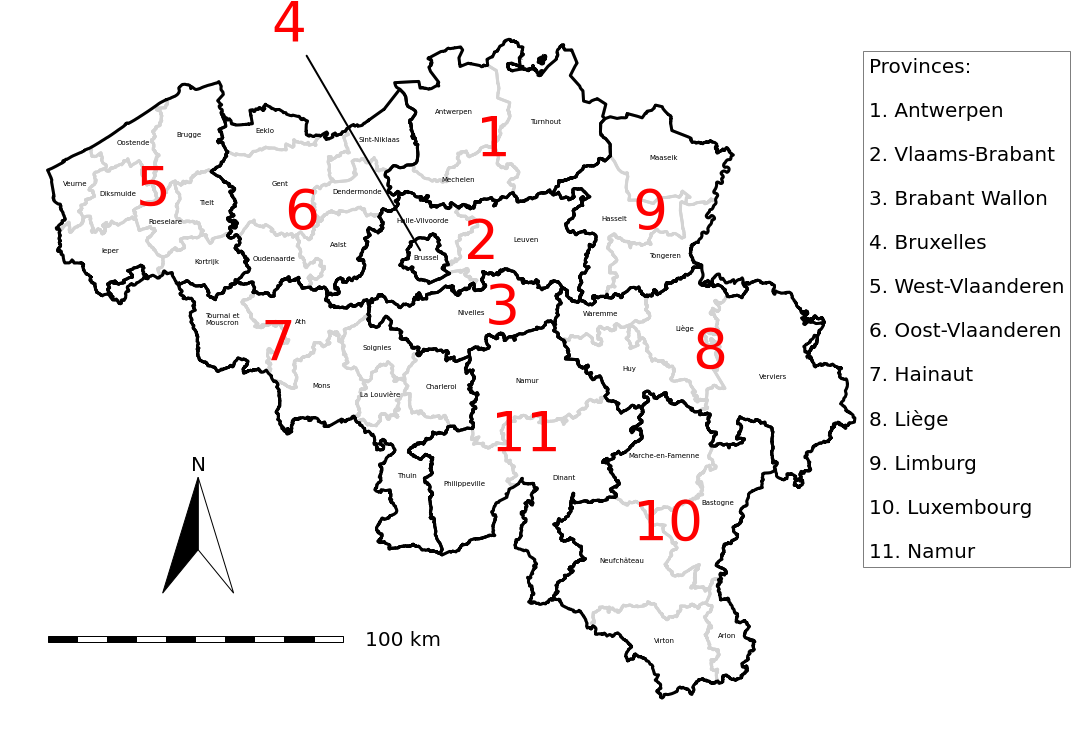

In [8]:
fig,ax = plt.subplots(figsize=(15,15))
ax.axis('off')

# Shapes
arrondissements.plot(ax=ax, facecolor="none", edgecolor="lightgrey", linewidth=3)
provinces.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=3)

# Text arrondissements
arrondissements.apply(lambda x: ax.annotate(text=x['NameLocal'], xy=x.geometry.centroid.coords[0], ha='center', size=7, color='k'), axis=1)
ax.text(640000, 682000, 'Halle-Vilvoorde', size=7)

# Text provinces
#provinces.apply(lambda x: ax.annotate(text=x['NameLocal'], xy=x.geometry.centroid.coords[0], ha='center', size=9, color='k'), axis=1)


add_north_arrow(ax, (0.215, 0.35), yheight=0.1, xwidth=0.08,)
add_scalebar(ax, (522000, 540000), length=100000, fac='   100 km', numdiv=10)

textstr = '\n\n'.join(('Provinces:',
                     '1. Antwerpen',
                     '2. Vlaams-Brabant',
                     '3. Brabant Wallon',
                     '4. Bruxelles',
                     '5. West-Vlaanderen',
                     '6. Oost-Vlaanderen',
                     '7. Hainaut',
                     '8. Liège',
                     '9. Limburg',
                     '10. Luxembourg',
                     '11. Namur'))

props = dict(boxstyle='square', facecolor='none', alpha=0.5)
# place a text box in upper left in axes coords
ax.text(0.97, 0.93, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)

alpha = 1
color = 'red'
size = 55

ax.text(667000, 705000, '1', size=size, color=color, alpha=alpha) # Antwerpen
ax.text(663000, 670000, '2', size=size, color=color, alpha=alpha) # Vlaams-Brabant
ax.text(670000, 648000, '3', size=size, color=color, alpha=alpha) # Waals-Brabant

#ax.text(600000, 750000, '4', size=size, color=color, alpha=alpha) # Brussel

arrow_args = dict(arrowstyle="-", lw=2,)
ax.annotate('4', size=size, color=color, alpha=alpha,
             xy=(0.39, 0.45), xycoords='figure fraction',
             xytext=(-150, 200), textcoords='offset points',
             ha="left", va="bottom",
             arrowprops=arrow_args)

ax.text(552000, 688000, '5', size=size, color=color, alpha=alpha) # West-Vlaanderen
ax.text(602000, 680000, '6', size=size, color=color, alpha=alpha) # Oost-Vlaanderen
ax.text(594000, 636000, '7', size=size, color=color, alpha=alpha) # Hainaut
ax.text(740000, 633000, '8', size=size, color=color, alpha=alpha) # Liège
ax.text(720000, 680000, '9', size=size, color=color, alpha=alpha) # Limburg
ax.text(720000, 575000, '10', size=size, color=color, alpha=alpha) # Luxembourg
ax.text(672000, 605000, '11', size=size, color=color, alpha=alpha) # Namur

plt.tight_layout()

plt.savefig('map-of-belgian-arrondissements.pdf', dpi=800, bbox_inches='tight')